# CALIFORNIA HOUSING PRICE

In this project, using the dataset from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices?resource=download) we will use Machine Learning to predict housing price in California.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import rcParams
from matplotlib.cm import rainbow
import matplotlib.pyplot as plt

## Load the data

The data contains these features:

* longitude: A measure of how far west a house is; a higher value is farther west
* latitude: A measure of how far north a house is; a higher value is farther north
* housingMedianAge: Median age of a house within a block; a lower number is a newer building
* totalRooms: Total number of rooms within a block
* totalBedrooms: Total number of bedrooms within a block
* population: Total number of people residing within a block
* households: Total number of households, a group of people residing within a home unit, for a block
* medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
* medianHouseValue: Median house value for households within a block (measured in US Dollars)
* oceanProximity: Location of the house w.r.t ocean/sea

In [3]:
data = pd.read_csv('housing.csv')
data.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Data preprocessing

In [6]:
# Checking for missing values
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

We have missing values in **total_bedrooms** column. We drop the Nan values.

In [8]:
data.dropna(inplace=True)
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

## Data preprocessing

### Splitting the data

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = data.drop(['median_house_value'], axis=1) # we drop the target value when we create X
y = data['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [14]:
# Join the train data to analyse correlations
train_data = X_train.join(y_train)
train_data.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
15888,-122.39,37.74,45.0,1462.0,308.0,924.0,302.0,2.1767,NEAR BAY,185300.0
9547,-120.84,37.40,7.0,2773.0,530.0,1374.0,505.0,2.6214,INLAND,103800.0
13382,-117.59,34.13,10.0,20263.0,3915.0,9716.0,3744.0,3.8505,INLAND,169600.0
5541,-118.40,33.97,35.0,913.0,161.0,451.0,172.0,5.6169,<1H OCEAN,411200.0
20258,-119.17,34.20,36.0,2028.0,523.0,2751.0,496.0,3.0150,NEAR OCEAN,149300.0


### Understanding the data

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

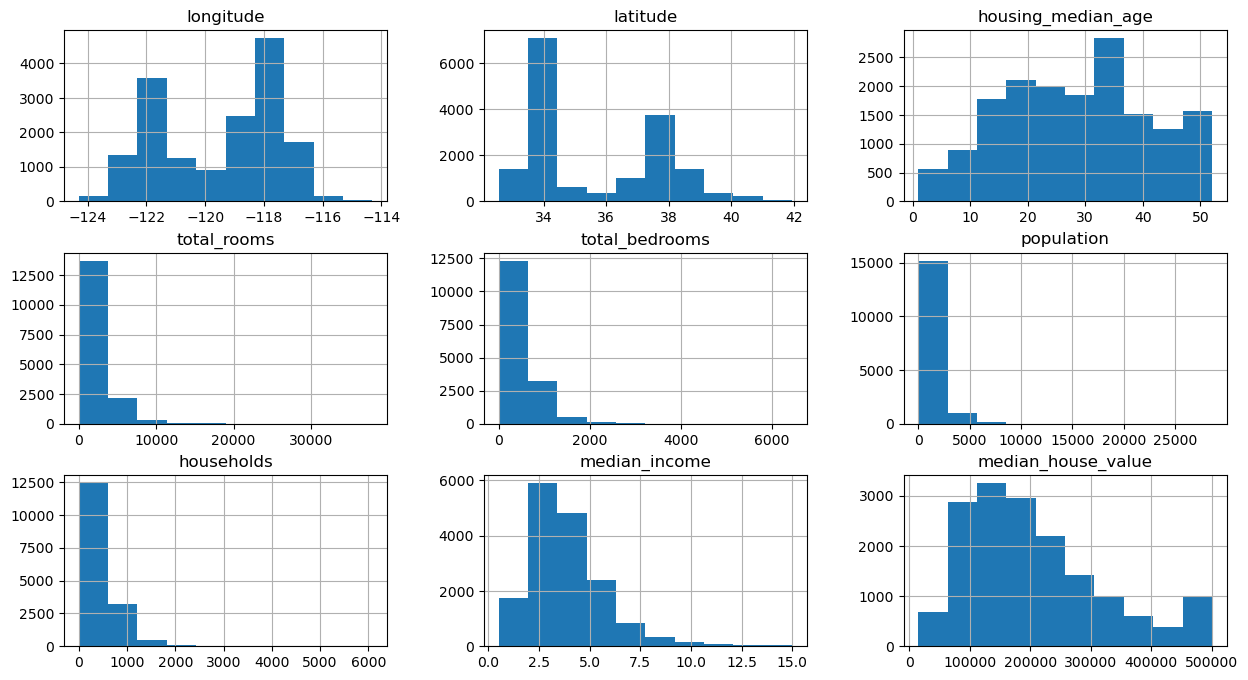

In [17]:
train_data.hist(figsize=(15,8))

Use the heatmap to visualize correlation matrix.

<AxesSubplot:>

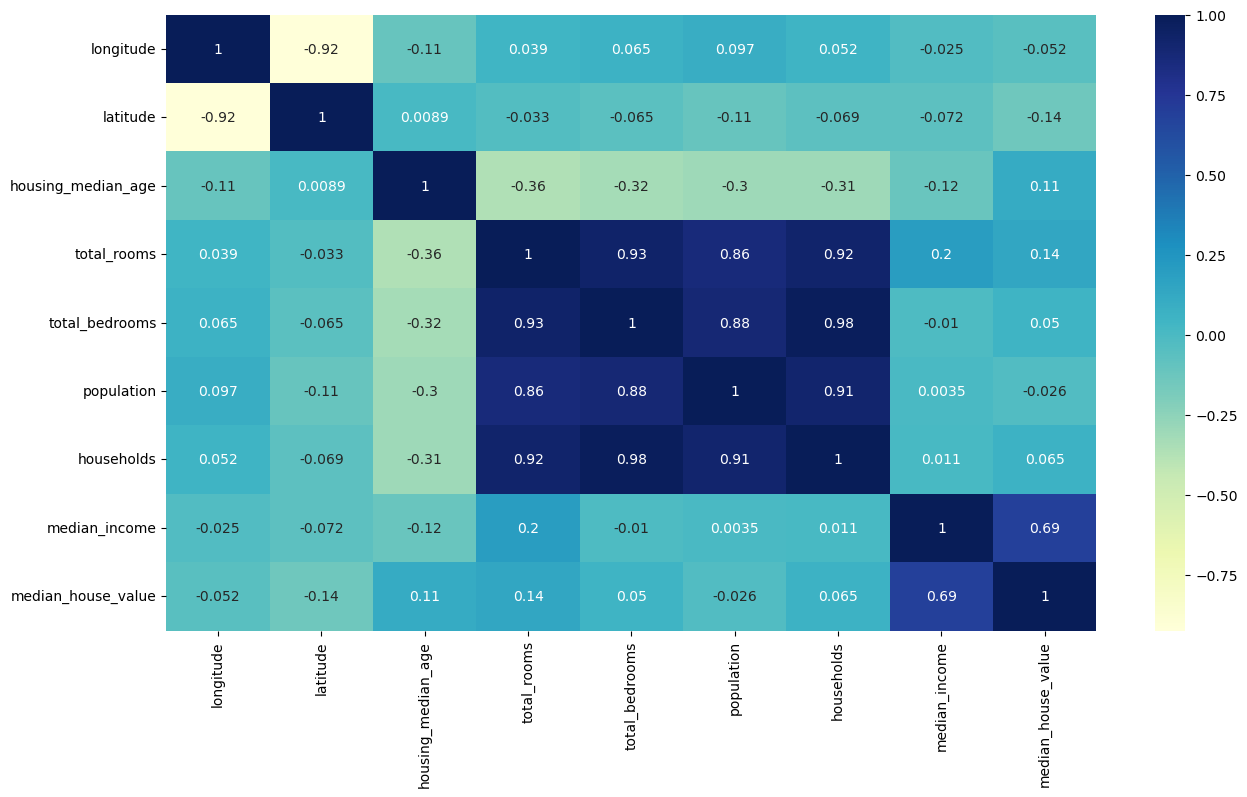

In [19]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

We can see from the heatmap that the **mediam_house_value** has high correlation with **the median_income.**

From the histograms we can see that data for some features is skewed. We are going to fix the problem by taking the log of those features.

In [20]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

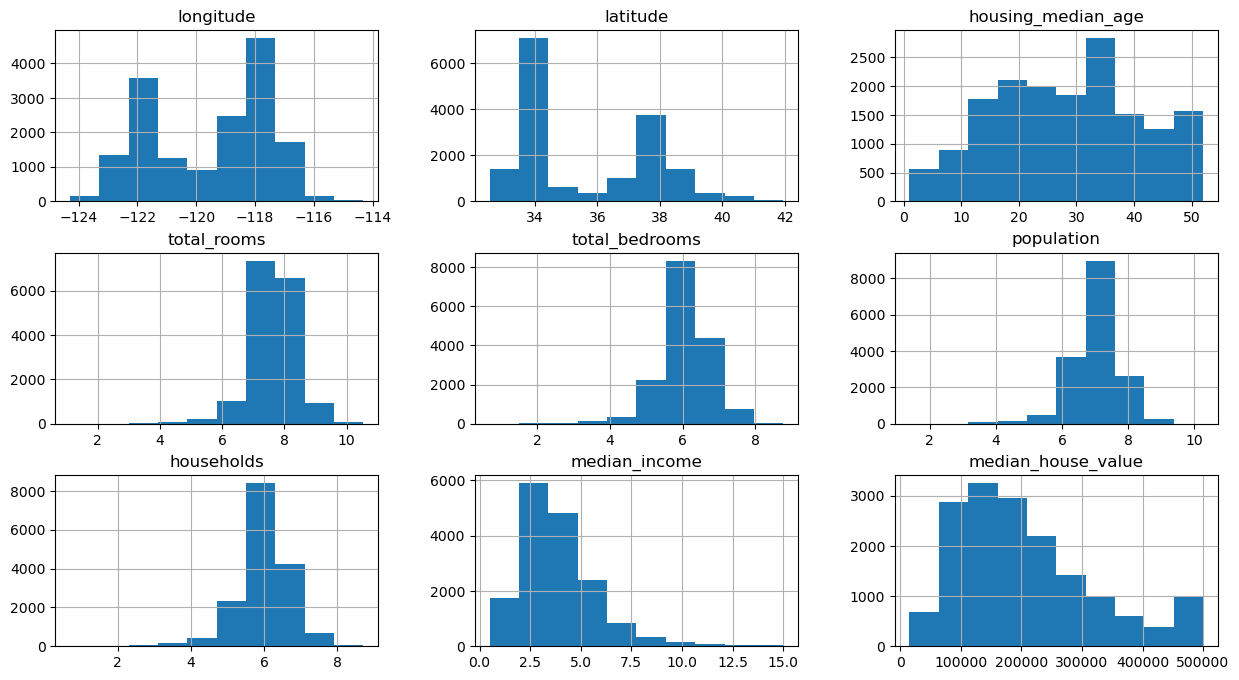

In [22]:
train_data.hist(figsize=(15,8))

### Encode categorical data

We need to encode the categorical data **ocean_proximity.**

In [23]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7203
INLAND        5203
NEAR OCEAN    2118
NEAR BAY      1818
ISLAND           4
Name: ocean_proximity, dtype: int64

In [24]:
train_data = pd.get_dummies(train_data, columns = ['ocean_proximity'])
train_data.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
15888,-122.39,37.74,45.0,7.288244,5.733341,6.829794,5.713733,2.1767,185300.0,0,0,0,1,0
9547,-120.84,37.40,7.0,7.928046,6.274762,7.226209,6.226537,2.6214,103800.0,0,1,0,0,0
13382,-117.59,34.13,10.0,9.916601,8.272826,9.181632,8.228177,3.8505,169600.0,0,1,0,0,0
5541,-118.40,33.97,35.0,6.817831,5.087596,6.113682,5.153292,5.6169,411200.0,1,0,0,0,0
20258,-119.17,34.20,36.0,7.615298,6.261492,7.920083,6.208590,3.0150,149300.0,0,0,0,0,1


Let's evaluate the correlation again.

<AxesSubplot:>

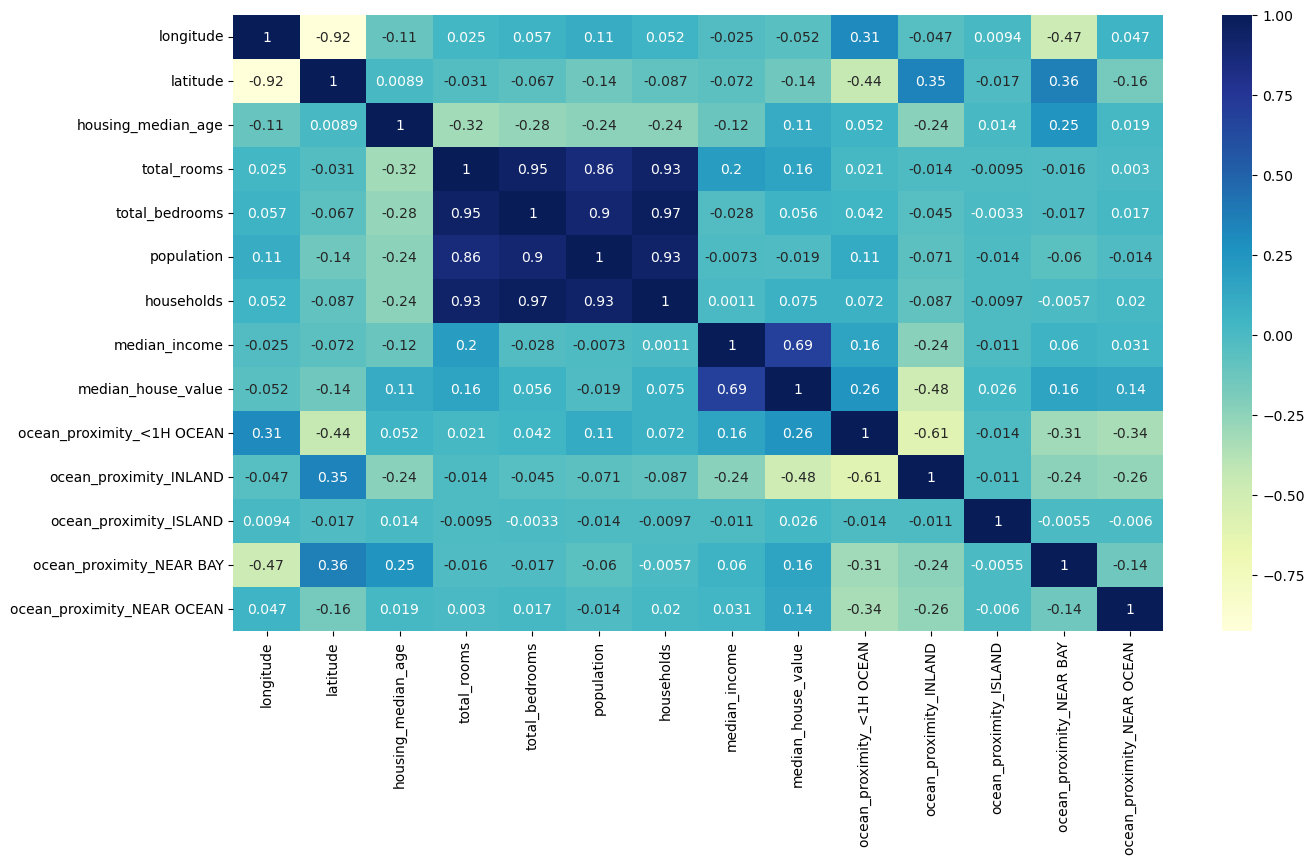

In [25]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

We can see for example that the **ocean_proximity_INLAND** has a negative correlation with **the median_house_value**.

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

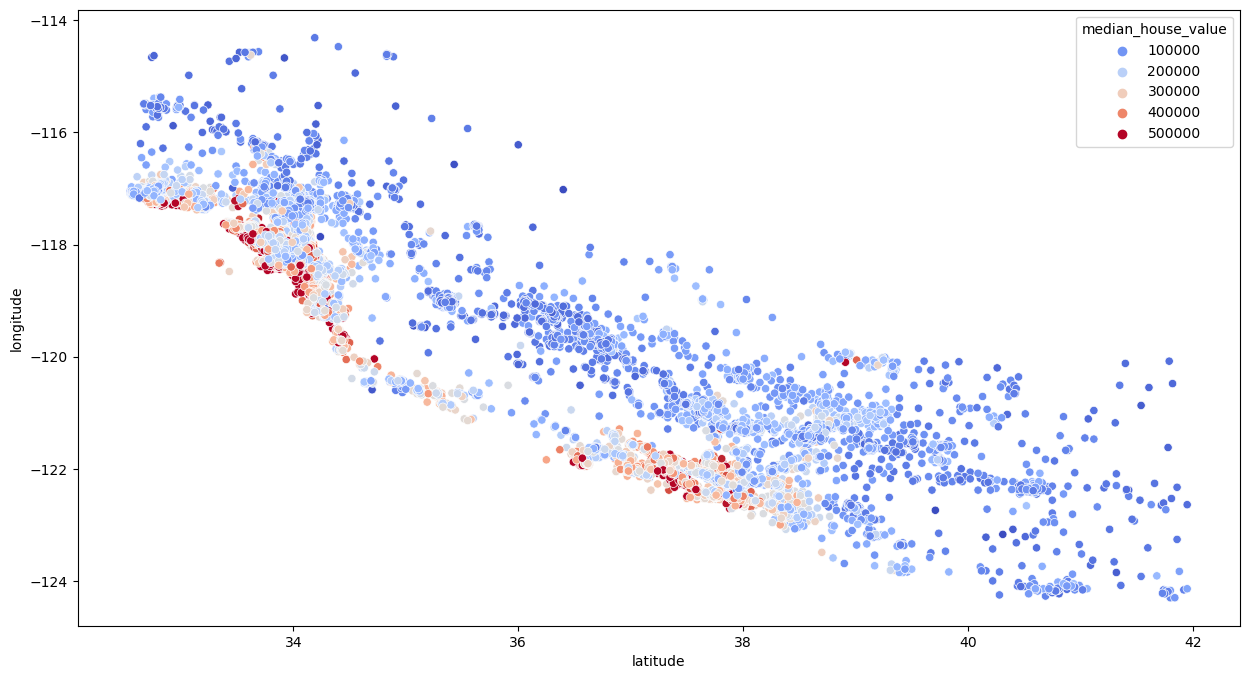

In [26]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value',palette='coolwarm')

### Feature engineering

In [28]:
# It could be interesting to add more feature by manipulating the features that we already have. 
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['householdsrooms'] = train_data['total_rooms'] / train_data['households']

<AxesSubplot:>

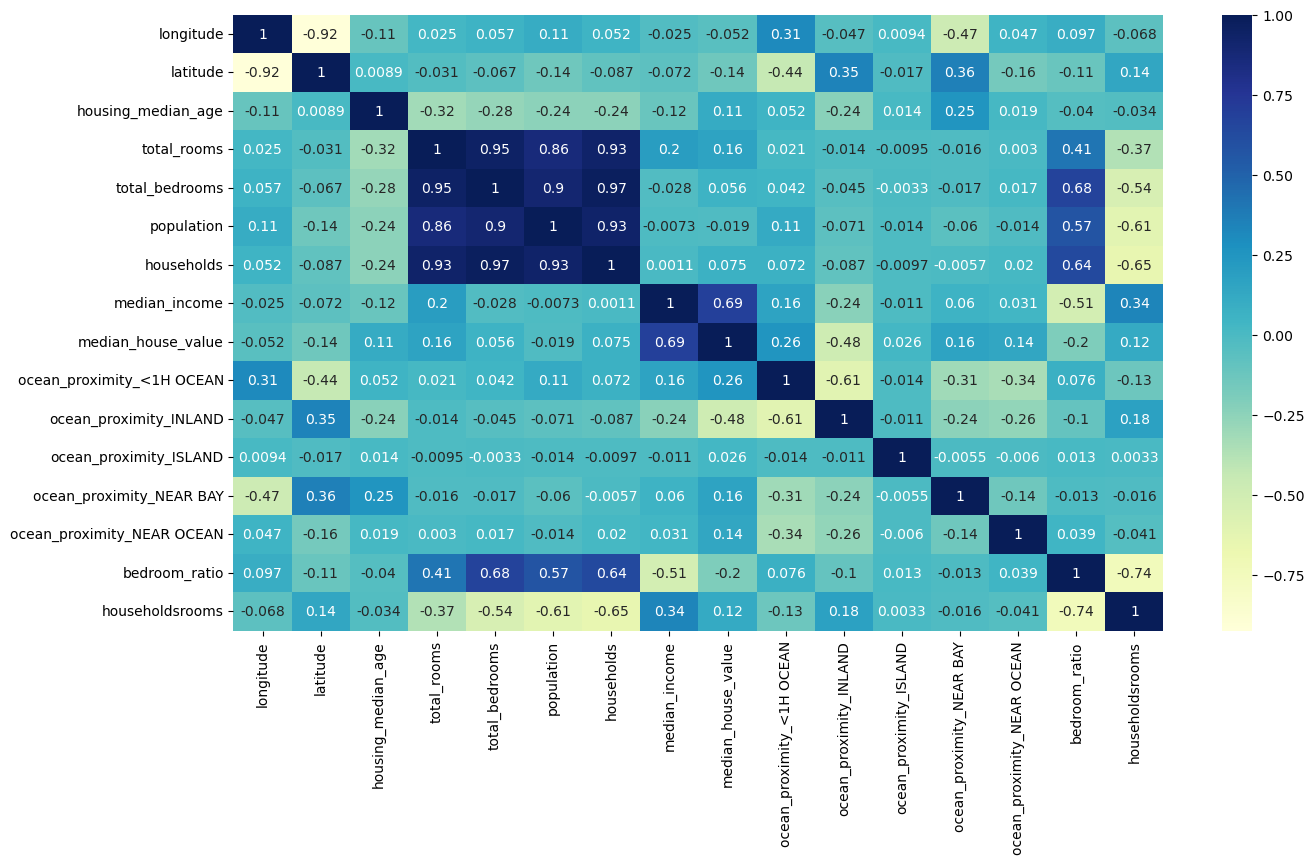

In [29]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

We added to features that seem to be interesting.

## Build the model

### Simple Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression
X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [32]:
# Report the same change we did on the train data also on test data (we can use a function, it is just to show the project flow)
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = pd.get_dummies(test_data, columns = ['ocean_proximity'])

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['householdsrooms'] = test_data['total_rooms'] / test_data['households']

test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,bedroom_ratio,householdsrooms
7288,-118.22,33.98,42.0,6.440947,4.969813,6.439350,5.056246,3.1250,166300.0,1,0,0,0,0,0.771597,1.273859
5598,-118.27,33.80,38.0,7.277248,5.793014,6.888572,5.768321,3.3500,177700.0,1,0,0,0,0,0.796045,1.261589
15951,-122.44,37.72,48.0,7.892078,6.373320,7.480992,6.293419,3.9565,268500.0,0,0,0,1,0,0.807559,1.254021
4224,-118.29,34.11,30.0,7.928406,6.347389,6.981935,6.364751,5.2960,500001.0,1,0,0,0,0,0.800588,1.245674
11525,-118.05,33.72,22.0,8.597297,7.148346,7.723562,7.077498,3.8038,174500.0,1,0,0,0,0,0.831464,1.214737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14365,-117.23,32.72,43.0,6.859615,5.347108,5.973810,5.351858,2.1635,244200.0,0,0,0,0,1,0.779505,1.281726
18442,-121.82,37.25,24.0,8.115222,6.276643,7.478170,6.295266,5.8305,245600.0,1,0,0,0,0,0.773441,1.289099
4724,-118.37,34.06,52.0,7.714231,6.049733,6.725034,6.021023,5.0858,470000.0,1,0,0,0,0,0.784230,1.281216
10561,-117.71,33.62,22.0,7.832411,5.961005,7.199678,5.971262,5.8898,242800.0,1,0,0,0,0,0.761069,1.311684


In [ ]:
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [33]:
regressor.score(X_test, y_test)

0.6741443239688993

Using  Simple Linear Regression we obtain 0.67, which is not too bad but aldo not good.

We can try to apply feature scaling to the data before.

### Feature Scaling

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)

regressor = LinearRegression()
regressor.fit(X_train_s, y_train)

LinearRegression()

In [36]:
X_test_s = scaler.transform(X_test)

In [37]:
regressor.score(X_test_s, y_test)

0.6741443239688992

In this case it does not change too much scaling the data.

## Random Forest Regression

In [41]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [42]:
regressor.score(X_test, y_test)

0.8130589032536272

Use cross validation to find hyperparameters to improve the performance.

In [46]:
from sklearn.model_selection import GridSearchCV
forest = RandomForestRegressor()

param_grid = {
    "n_estimators" : [3, 10, 30],
    "max_features" : [2, 4, 6, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)
grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [47]:
best_forest = grid_search.best_estimator_

In [48]:
best_forest.score(X_test_s, y_test)

0.806262803901753

By adjusting the parameters in the param_grid we can test and find the best hyperparameters for our regressor.